# Explore CMIP6 Data

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot

In [3]:
cat = pd.read_csv("https://cmip6-pds.s3-us-west-2.amazonaws.com/pangeo-cmip6.csv")
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522217 entries, 0 to 522216
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   activity_id     522217 non-null  object 
 1   institution_id  522217 non-null  object 
 2   source_id       522217 non-null  object 
 3   experiment_id   522217 non-null  object 
 4   member_id       522217 non-null  object 
 5   table_id        522217 non-null  object 
 6   variable_id     522217 non-null  object 
 7   grid_label      522217 non-null  object 
 8   zstore          522217 non-null  object 
 9   dcpp_init_year  141466 non-null  float64
 10  version         522217 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 43.8+ MB


# GDFL-CM4 daily

## historical

### Querying

In [17]:
gdfl_cm4_hist_result = cat.query("experiment_id=='historical' & source_id=='GFDL-CM4'& grid_label=='gr1' & table_id=='day'")

In [18]:
gdfl_cm4_hist_result['variable_id'].unique()

array(['sfcWindmax', 'snc', 'snw', 'sfcWind', 'rsus', 'pr', 'huss',
       'mrro', 'mrso', 'mrsos', 'prc', 'tasmax', 'tas', 'rsds', 'prsn',
       'psl', 'rlds', 'rlus', 'rlut', 'tasmin', 'tslsi', 'uas', 'vas',
       'hursmin', 'hursmax', 'clt', 'hfls', 'hfss', 'hurs'], dtype=object)

In [8]:
gdfl_cm4_hist_result

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
520,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,ua,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
521,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,toz,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
522,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,so2,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
523,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,rsutcsaf,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
524,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,rsutaf,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
...,...,...,...,...,...,...,...,...,...,...,...
6724,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,EmonZ,epfz,gr2z,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
6725,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,EmonZ,tntc,gr1z,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
6726,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,EmonZ,tntmp,gr1z,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
6727,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Emon,utendnogw,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701


### Exporting

In [38]:
import s3fs
import time
fs = s3fs.S3FileSystem(anon=True)

In [21]:
# precipitation
gdfl_cm4_hist_pr_url = gdfl_cm4_hist_result.query("variable_id=='pr'")['zstore']
hist_pr_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_pr_url.values[-1]), consolidated=True)
hist_pr_daily_ds = hist_pr_daily_ds['pr'].sel(lat=slice(-12, 32), lon=slice(42, 102))
hist_pr_daily_ds.to_netcdf('shared/data/gdfl_cm4_daily/pr.nc')

In [40]:
list_of_vars = ['tos']

for var in list_of_vars:
    gdfl_cm4_hist_url = gdfl_cm4_hist_result.query(f"variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_hist_url) == 0:
        print(f'no variable {var} in this database')
        continue
    hist_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_url.values[-1]), consolidated=True)
    hist_daily_ds = hist_daily_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    hist_daily_ds.to_netcdf(f'shared/data/gdfl_cm4_daily/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable tas
finish exporting variable psl
finish exporting variable uas
finish exporting variable vas
finish exporting variable sfcWind


IndexError: index -1 is out of bounds for axis 0 with size 0

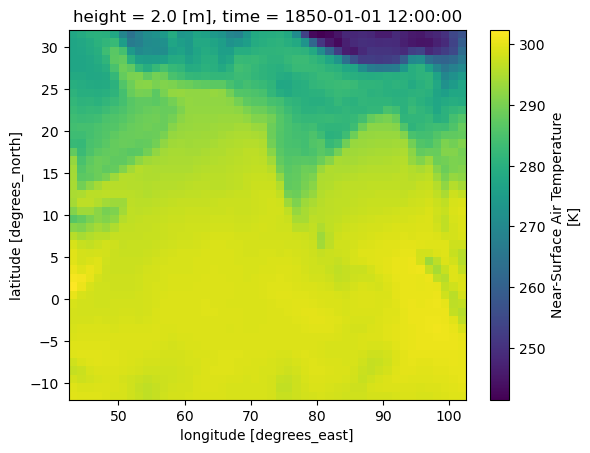

In [61]:
xr.open_dataset('shared/data/gdfl_cm4_daily/tas.nc')['tas'].isel(time=0).plot.imshow()

### SST

In [44]:
gdfl_cm4_hist_result = cat.query("experiment_id=='historical' & source_id=='GFDL-CM4' & table_id=='Oday'")
gdfl_cm4_hist_result

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6685,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
6686,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701


In [87]:
# query only returns tos variable
# sea surface temperature
grid1_sst_hist_daily = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_result.zstore.values[0]),
                                    consolidated=True)
grid1_sst_hist_daily

<xarray.Dataset>
Dimensions:    (bnds: 2, y: 1080, x: 1440, vertex: 4, time: 60225)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(30113, 1), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Dimensions without coordinates: vertex
Data variables:
    tos        (time, y, x) float32 dask.array<chunksize=(18, 1080, 1440), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tos
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-11-16;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e3b86300-29b2-4220-97ce-40fa504858e5...
    version_id:             v20180701

### Shifting grids

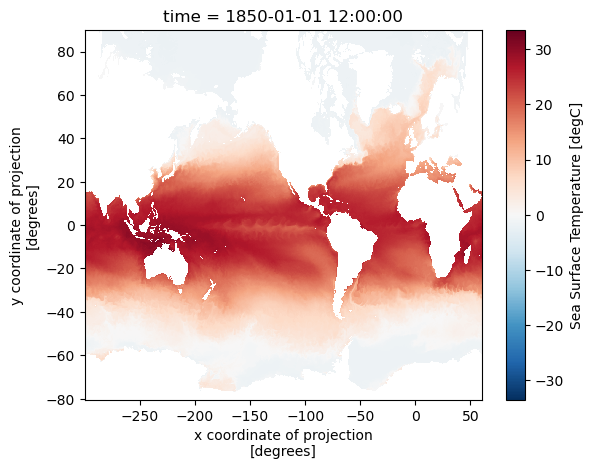

In [57]:
grid1_sst_hist_daily['tos'].isel(time=0).plot.imshow()

In [95]:
grid1_sst_hist_daily = grid1_sst_hist_daily.reindex(x=sorted(grid1_sst_hist_daily['x']))

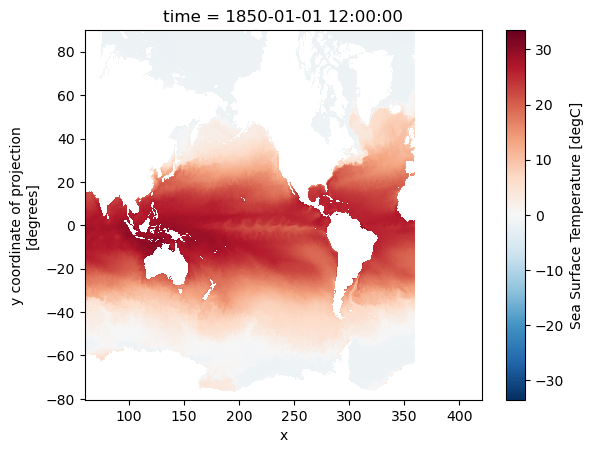

In [102]:
ds_neg.isel(time=0).plot.imshow()

In [103]:
mask = (grid1_sst_hist_daily['x'] >=0 ) & (grid1_sst_hist_daily['x'] <65)
ds_neg = grid1_sst_hist_daily.where(~mask)
ds_neg['x'] = ds_neg['x'] + 360
ds_pos = grid1_sst_hist_daily.where(mask)

grid1_sst_hist_daily_reordered = xr.concat([ds_pos.sel(x=slice(0, 65)), ds_neg.sel(x=slice(0, 360))], dim='x')

In [107]:
grid1_sst_hist_daily['x'].max().values

array(60.02771229)

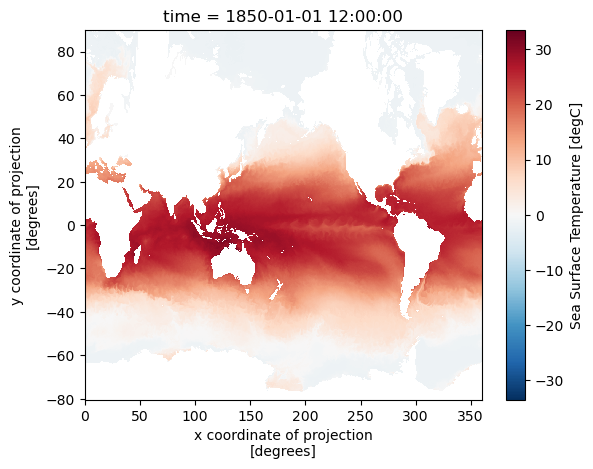

In [105]:
grid1_sst_hist_daily_reordered.isel(time=0).plot.imshow()

In [113]:
# implement for dataarray
# shift back to coord 0 -> 360
# shift right only
def shift(da, coord_to_shift, shift_position='right'):
    # make a mask (can also manual split)
    max_lon = da[coord_to_shift].max().values+0.1
    mask = (da[coord_to_shift] >=0) & (da[coord_to_shift] < max_lon)
    
    # partition
    # split data to negative and positive coords, then reorder back to 0
    da_neg = da.where(~mask)
    da_pos = da.where(mask)
    da_neg[coord_to_shift] = da_neg[coord_to_shift] +360
    return xr.concat([da_pos.sel({coord_to_shift :slice(0, max_lon)}), da_neg.sel({coord_to_shift:slice(0, 360)})], dim=coord_to_shift)

### Back to processing

In [122]:
grid1_sst_hist_daily_da = shift(grid1_sst_hist_daily, 'x', 60)

In [123]:
grid1_sst_hist_daily_da = grid1_sst_hist_daily_da.sel(x=slice(42, 102), y=slice(-12, 32))

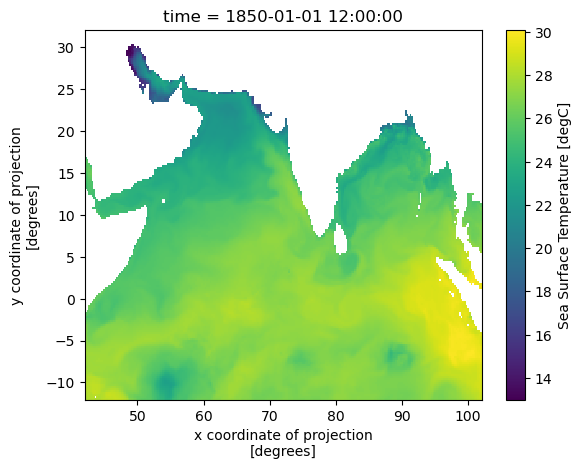

In [124]:
grid1_sst_hist_daily_da.isel(time=0).plot.imshow()

In [126]:
grid1_sst_hist_daily_da.to_netcdf('shared/data/gdfl_cm4_daily/hq_tos.nc')

In [128]:
grid2_sst_hist_daily = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_result.zstore.values[1]),
                                    consolidated=True)
grid2_sst_hist_daily['tos'].sel(lat=slice(-12, 32), lon=slice(42, 102)).to_netcdf('shared/data/gdfl_cm4_daily/tos.nc')

In [174]:
hist_pr_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_pr_url.values[-1]), consolidated=True)

# add attr template
with open('shared/data/gdfl/historical_daily/attr_template.json', 'w') as file:
    json.dump(hist_pr_daily_ds.attrs, file)

## ssp245

### Querying

In [161]:
gdfl_daily_245_result = cat.query("experiment_id=='ssp245' & source_id=='GFDL-CM4'& grid_label=='gr1' & table_id=='day'")

In [162]:
gdfl_daily_245_result['variable_id'].unique()

array(['vas', 'uas', 'snw', 'tslsi', 'tasmin', 'tasmax', 'tas', 'sfcWind',
       'rsus', 'rlut', 'rlus', 'rlds', 'rsds', 'sfcWindmax', 'snc', 'clt',
       'mrso', 'mrsos', 'psl', 'prsn', 'prc', 'pr', 'huss', 'hursmin',
       'hursmax', 'hurs', 'hfss', 'hfls', 'mrro'], dtype=object)

In [132]:
list_of_vars = ['vas', 'uas', 'pr', 'psl', 'sfcWind', 'tas']

for var in list_of_vars:
    gdfl_cm4_hist_url = gdfl_daily_245_result.query(f"variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_hist_url) == 0:
        print(f'no variable {var} in this database')
        continue
    hist_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_url.values[-1]), consolidated=True)
    hist_daily_ds = hist_daily_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    hist_daily_ds.to_netcdf(f'shared/data/gdfl/ssp245_daily/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable vas
finish exporting variable uas
finish exporting variable pr
finish exporting variable psl
finish exporting variable sfcWind
finish exporting variable tas


### SST

In [145]:
gdfl_daily_245_result = cat.query("experiment_id=='ssp245' & source_id=='GFDL-CM4'& variable_id=='tos'")
gdfl_daily_245_result

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
17861,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Oday,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
17862,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Oday,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
17990,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
17991,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701


In [147]:
# we want to process the first two rows
sst_245_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_daily_245_result.zstore.values[0]),
                                    consolidated=True)

In [148]:
sst_245_daily_ds['tos'].sel(lat=slice(-12, 32), lon=slice(42, 102)).to_netcdf('shared/data/gdfl/ssp245_daily/tos.nc')

In [153]:
sst_hq_245_daily = xr.open_zarr(fs.get_mapper(gdfl_daily_245_result.zstore.values[1]),
                                    consolidated=True)['tos']

In [154]:
sst_hq_245_daily_shifted = shift(sst_hq_245_daily, 'x', 60)

In [159]:
sst_hq_245_daily_shifted.sel(y=slice(-12, 32), x=slice(42, 102)).to_netcdf('shared/data/gdfl/ssp245_daily/hq_tos.nc')

In [168]:
hist_daily_ds

<xarray.DataArray 'tas' (time: 31390, lat: 44, lon: 48)>
dask.array<getitem, shape=(31390, 44, 48), dtype=float32, chunksize=(420, 44, 48), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -11.5 -10.5 -9.5 -8.5 -7.5 ... 28.5 29.5 30.5 31.5
  * lon      (lon) float64 43.12 44.38 45.62 46.88 ... 98.12 99.38 100.6 101.9
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [176]:
with open('shared/data/gdfl/ssp245_daily/attr_template.json','w') as file:
    json.dump(sst_245_daily_ds.attrs, file)

## SSP-585

In [165]:
gdfl_daily_585_result = cat.query("experiment_id=='ssp585' & source_id=='GFDL-CM4' & grid_label=='gr1' & table_id=='day'")
gdfl_daily_585_result['variable_id'].unique()

array(['tas', 'tasmax', 'tasmin', 'rsus', 'rsds', 'mrso', 'prsn', 'mrsos',
       'pr', 'prc', 'rlut', 'rlus', 'rlds', 'psl', 'snc', 'mrro', 'huss',
       'sfcWindmax', 'sfcWind', 'snw', 'hursmin', 'hursmax', 'hurs',
       'vas', 'uas', 'tslsi'], dtype=object)

In [177]:
list_of_vars = ['vas', 'uas', 'pr', 'psl', 'sfcWind', 'tas']

for var in list_of_vars:
    gdfl_cm4_hist_url = gdfl_daily_585_result.query(f"variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_hist_url) == 0:
        print(f'no variable {var} in this database')
        continue
    hist_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_url.values[-1]), consolidated=True)
    hist_daily_ds = hist_daily_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    hist_daily_ds.to_netcdf(f'shared/data/gdfl/ssp585_daily/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable vas
finish exporting variable uas
finish exporting variable pr
finish exporting variable psl
finish exporting variable sfcWind
finish exporting variable tas


In [178]:
xr.open_dataarray('shared/data/gdfl/ssp585_daily/pr.nc')

<xarray.DataArray 'pr' (time: 31390, lat: 44, lon: 48)>
[66295680 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -11.5 -10.5 -9.5 -8.5 -7.5 ... 28.5 29.5 30.5 31.5
  * lon      (lon) float64 43.12 44.38 45.62 46.88 ... 98.12 99.38 100.6 101.9
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [180]:
gdfl_daily_585_result = cat.query("experiment_id=='ssp585' & source_id=='GFDL-CM4'& variable_id=='tos'")

In [182]:
# we want to process the first two rows
sst_585_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_daily_585_result.zstore.values[0]),
                                    consolidated=True)

In [184]:
with open('shared/data/gdfl/ssp585_daily/attr_template.json', 'w') as file:
    json.dump(sst_585_daily_ds.attrs, file)

In [186]:
sst_585_daily_ds_shifted = shift(sst_585_daily_ds['tos'], 'x', 60)
sst_585_daily_ds_shifted.sel(x=slice(42, 102), y=slice(-12, 32)).to_netcdf('shared/data/gdfl/ssp585_daily/hq_tos.nc')

In [187]:
xr.open_zarr(fs.get_mapper(gdfl_daily_585_result.zstore.values[1]),
                                    consolidated=True).sel(
    lat=slice(-12, 32),
    lon=slice(42, 102)
).to_netcdf('shared/data/gdfl/ssp585_daily/tos.nc')

# GDFL-CM4 Monthly

## Exploring

In [228]:
monthly_hist_result = cat.query("experiment_id=='historical' & source_id=='GFDL-CM4'")
monthly_hist_result['table_id'].unique() # Amon, CFmon, Emon, Omon

array(['AERmon', 'Amon', 'day', 'Oyr', 'SImon', 'SIday', 'fx', 'EdayZ',
       '3hr', 'Eday', 'CFday', 'CFmon', '6hrLev', '6hrPlevPt', 'AERmonZ',
       'Omon', 'LImon', 'Lmon', 'Eyr', 'Oday', 'Ofx', 'EmonZ', 'Emon'],
      dtype=object)

In [240]:
monthly_hist_result.query("table_id=='Amon' & variable_id=='vas'")

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6523,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,vas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701


In [204]:
monthly_hist_result.query("table_id=='Omon'")['variable_id'].unique() #tos, sos

array(['expc', 'fgco2', 'hfds', 'masso', 'mfo', 'o2', 'ph', 'phyc',
       'phyp', 'po4', 'pp', 'sf6', 'so', 'sos', 'dissoc', 'talk',
       'dissic', 'co3satcalc', 'zos', 'thetao', 'tauvo', 'chl', 'tauuo',
       'co3', 'dfe', 'wfo', 'volo', 'cfc12', 'thetaoga', 'tos', 'uo',
       'vo', 'volcello', 'cfc11'], dtype=object)

In [205]:
monthly_hist_result.query("table_id=='Emon'")['variable_id'].unique()

array(['ps', 'treeFracBdlDcd', 'treeFracBdlEvg', 'treeFracNdlEvg',
       'utendogw', 'vegFrac', 'vtendnogw', 'vtendogw', 'utendnogw'],
      dtype=object)

In [206]:
monthly_hist_result.query("table_id=='Amon'")['variable_id'].unique() #pr, uas, vas, psl, sfcWind

array(['ccb', 'n2oglobal', 'o3', 'pr', 'prc', 'prsn', 'prw', 'ps', 'psl',
       'rlds', 'rldscs', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs',
       'rsdt', 'rsus', 'mc', 'huss', 'hurs', 'hcfc22global', 'hfss',
       'hur', 'hus', 'hfls', 'evspsbl', 'co2mass', 'clw', 'clwvi',
       'rsuscs', 'rsutcs', 'clt', 'clivi', 'cl', 'cct', 'cfc113global',
       'cfc11global', 'cfc12global', 'ch4global', 'ci', 'cli', 'ua',
       'uas', 'va', 'vas', 'wap', 'zg', 'ts', 'tauv', 'tasmin', 'rtmt',
       'sci', 'sfcWind', 'ta', 'tas', 'tasmax', 'tauu', 'rsut'],
      dtype=object)

In [208]:
xr.open_zarr(fs.get_mapper(monthly_hist_result.query("table_id=='Amon' & variable_id=='pr'").zstore.values[0]),
                                    consolidated=True)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            pr
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-07;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/29b4a002-10ac-428c-8f1d-b57656ab1d02...
    version_id:             v20180701

In [231]:
var_amon = ['pr', 'uas', 'vas', 'psl', 'sfcWind', 'tas']
for var in var_amon:
    gdfl_cm4_hist_url = monthly_hist_result.query(f"table_id=='Amon' & variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_hist_url) == 0:
        print(f'no variable {var} in this database')
        continue
    hist_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_url.values[-1]), consolidated=True)
    hist_daily_ds = hist_daily_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    hist_daily_ds.to_netcdf(f'shared/data/gdfl/historical_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable pr
finish exporting variable uas
finish exporting variable vas
finish exporting variable psl
finish exporting variable sfcWind
finish exporting variable tas


In [211]:
monthly_hist_result.query("table_id=='Omon' & variable_id=='tos'")

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6699,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
6700,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701


In [232]:
var_omon = ['tos', 'sos']
for var in var_omon:
    gdfl_cm4_hist_url = monthly_hist_result.query(f"variable_id=='{var}' & grid_label=='gr' & table_id=='Omon'")['zstore']
    if len(gdfl_cm4_hist_url) == 0:
        print(f'no variable {var} in this database')
        continue
    hist_daily_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_hist_url.values[-1]), consolidated=True)
    hist_daily_ds = hist_daily_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    hist_daily_ds.to_netcdf(f'shared/data/gdfl/historical_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable tos
finish exporting variable sos


In [218]:
hq_tos_ds = xr.open_zarr(fs.get_mapper(monthly_hist_result.query("variable_id=='tos' \
                                                                 & grid_label=='gn'")['zstore'].values[0]),
                        consolidated=True)

In [220]:
with open('shared/data/gdfl/historical_monthly/attr_template.json', 'w') as file:
    json.dump(hq_tos_ds.attrs, file)

In [221]:
shift(hq_tos_ds.tos, 'x', 60).sel(x=slice(42, 102), y=slice(-12, 32)).to_netcdf('shared/data/gdfl/historical_monthly/hq_tos.nc')

### SSP245

In [233]:
monthly_245_result =  cat.query("experiment_id=='ssp245' & source_id=='GFDL-CM4'")
var_amon = ['pr', 'uas', 'vas', 'psl', 'sfcWind', 'tas']
for var in var_amon:
    gdfl_cm4_245_url = monthly_245_result.query(f"table_id=='Amon' & variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_245_url) == 0:
        print(f'no variable {var} in this database')
        continue
    daily_245_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_245_url.values[-1]), consolidated=True)
    daily_245_ds = daily_245_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    daily_245_ds.to_netcdf(f'shared/data/gdfl/ssp245_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)
    
var_omon = ['tos', 'sos']
for var in var_omon:
    gdfl_cm4_245_url = monthly_245_result.query(f"variable_id=='{var}' & table_id=='Omon' & grid_label=='gr'")['zstore']
    if len(gdfl_cm4_245_url) == 0:
        print(f'no variable {var} in this database')
        continue
    daily_245_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_245_url.values[-1]), consolidated=True)
    daily_245_ds = daily_245_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    daily_245_ds.to_netcdf(f'shared/data/gdfl/ssp245_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable pr
finish exporting variable uas
finish exporting variable vas
finish exporting variable psl
finish exporting variable sfcWind
finish exporting variable tas
finish exporting variable tos
finish exporting variable sos


In [224]:
hq_tos_ds = xr.open_zarr(fs.get_mapper(monthly_245_result.query("variable_id=='tos' \
                                                                 & grid_label=='gn'")['zstore'].values[0]),
                        consolidated=True)

shift(hq_tos_ds.tos, 'x', 60).sel(x=slice(42, 102), y=slice(-12, 32)).to_netcdf('shared/data/gdfl/ssp245_monthly/hq_tos.nc')


In [225]:
with open('shared/data/gdfl/ssp245_monthly/attr_template.json', 'w') as file:
    json.dump(hq_tos_ds.attrs, file)

## SSP585

In [234]:
monthly_585_result =  cat.query("experiment_id=='ssp585' & source_id=='GFDL-CM4'")
var_amon = ['pr', 'uas', 'vas', 'psl', 'sfcWind', 'tas']
for var in var_amon:
    gdfl_cm4_585_url = monthly_585_result.query(f"table_id=='Amon' & variable_id=='{var}'")['zstore']
    if len(gdfl_cm4_585_url) == 0:
        print(f'no variable {var} in this database')
        continue
    daily_585_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_585_url.values[-1]), consolidated=True)
    daily_585_ds = daily_585_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    daily_585_ds.to_netcdf(f'shared/data/gdfl/ssp585_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)
    
var_omon = ['tos', 'sos']
for var in var_omon:
    gdfl_cm4_585_url = monthly_585_result.query(f"variable_id=='{var}' & table_id=='Omon' & grid_label=='gr'")['zstore']
    if len(gdfl_cm4_585_url) == 0:
        print(f'no variable {var} in this database')
        continue
    daily_585_ds = xr.open_zarr(fs.get_mapper(gdfl_cm4_585_url.values[-1]), consolidated=True)
    daily_585_ds = daily_585_ds[var].sel(lat=slice(-12, 32), lon=slice(42, 102))
    daily_585_ds.to_netcdf(f'shared/data/gdfl/ssp585_monthly/{var}.nc')
    print(f'finish exporting variable {var}')
    time.sleep(1)

finish exporting variable pr
finish exporting variable uas
finish exporting variable vas
finish exporting variable psl
finish exporting variable sfcWind
finish exporting variable tas
finish exporting variable tos
finish exporting variable sos


In [227]:
hq_tos_ds = xr.open_zarr(fs.get_mapper(monthly_585_result.query("variable_id=='tos' \
                                                                 & grid_label=='gn'")['zstore'].values[0]),
                        consolidated=True)

shift(hq_tos_ds.tos, 'x', 60).sel(x=slice(42, 102), y=slice(-12, 32)).to_netcdf('shared/data/gdfl/ssp585_monthly/hq_tos.nc')

with open('shared/data/gdfl/ssp585_monthly/attr_template.json', 'w') as file:
    json.dump(hq_tos_ds.attrs, file)

## PLOTTING